# Tech Careers: Look Before You Leap
### By Fraser Fernandes

![IT Jobs Insights](images/CoverPicture.jpg)

## Tabel of Contents
### Part I
1) Introduction

2) Business Understanding

3) Data Understanding

4) Data Prepration

5) EDA

### Part II

6) Data Modeling

7) Model Evaluation

8) Deploying

# Introduction:
In this project, we will analyze survey data from Stack Overflow's annual Developer Survey to uncover valuable insights for individuals looking to break into the rapidly growing field of Data Science. By examining industry trends, required skills, salary expectations, and educational backgrounds of professionals in this space, we aim to provide actionable takeaways for aspiring data scientists. Whether you're transitioning from another field or starting fresh, this analysis will offer a data-driven roadmap to help you navigate your journey into Data Science.

**Data Source:** https://survey.stackoverflow.co/

Throughout this project we will be following the **CRISP-DM** process to evaluate data and note down our findings.

# Business Understanding

Coming from a non-tech background, I’m now venturing into the field of Data Science & Analytics. As I prepare to enter the job market, the Stack Overflow Developer Survey caught my attention, sparking my curiosity about the broader IT industry. It’s been both intriguing and inspiring to explore insights within and beyond my niche and gain a deeper understanding of the ever-evolving tech landscape.

With this project we aim to answer the following questions:

- How does Data Science differ from the IT sector in terms of education requirements? 

- What impact does education have on salaries in the IT field and Data Science?

- What programming languages, tools and technologies are most relevant for a Data Scientist?

- What programming languages are used by a disproportionaltely larger proportion of Data Scientists than the IT field?

- What are the main factors effecting salaries in the US?

In [1]:
# Installing necessary libraries
!pip install --upgrade pip
!pip install shap
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
import shap
from collections import Counter

from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, f1_score, make_scorer, mean_absolute_error, r2_score, mean_squared_error

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Loading our stackoverflow survey results dataset
data = pd.read_csv('raw_data/survey_results_public.csv')

# Data Understanding

In [4]:
data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [5]:
print(data.shape)

(89184, 84)


In [6]:
print(data.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [8]:
print(data.isnull().sum())

ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                              1286
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
LearnCode                               1521
LearnCodeOnline                        19100
LearnCodeCoursesCert                   52108
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
PurchaseInfluence                      24220
TechList                               28333
BuyNewTool                              6175
Country                                 1211
Currency                               23850
CompTotal                              40959
LanguageHaveWorkedWith                  2044
LanguageWa

### Observations:

Our dataset has over **89,184 rows** and **84 columns**.

Some important columns include:

- **`MainBranch`**: Purpose of development (e.g., Profession, Hobby, Student)
- **`Age`**: Age group of user
- **`RemoteWork`**: Mode of work ('Remote', 'Hybrid', 'In-person')
- **`EdLevel`**: Highest Education Qualification
- **`YearsCode`** & **`YearsCodePro`**: Years of experience in coding
- **`DevType`**: Type of Developer (e.g., Front-End Dev, Back-End Dev, Full-Stack Dev, Data Analyst, Data Scientist)
- **`OrgSize`**: Number of employees in the user's organization
- **`LanguageHaveWorkedWith`**, **`DatabaseHaveWorkedWith`**, **`PlatformHaveWorkedWith`**, **`WebframeHaveWorkedWith`**, **`MiscTechHaveWorkedWith`**, **`ToolsTechHaveWorkedWith`**: Programming Languages, Tools & Technologies the user has worked with
- **`ConvertedCompYearly`**: Salary of the user converted to USD

#### Issues with dataset:
- Our dataset has alot of null values

- Data needs to be formated to increase readibility

- Data Types of many columns need to be fixed

- Some columns have multiple entries which we can tackle by converting to lists and applying Multi Label Binarizer

# Data Prepration

In [9]:
df = data.copy()

### Dropping all rows with null values in `ConvertedCompYearly` and `DevType` as we will train models to predict them

In [10]:
df.dropna(subset=['ConvertedCompYearly', 'DevType'], inplace=True)
df.reset_index(drop=True, inplace=True)

### Dropping redundant columns

- **`ResponseId`** just a serial number.
- **`Q120`** has only 1 unique value.
- **`SurveyLength`** & **`SurveyEase`** only pertain to the survey.
- **`CompTotal`** has been dropped because it records compensation in terms of local currency. We can use **`ConvertedCompYearly`** instead.
- **`Frequency_1`**, **`Frequency_2`**, **`Frequency_3`** as they are not relevant to our topic of discussion.
- All **`Knowledge`** columns as they are highly subjective; we would rather rely on more objective factors.
- **`SO`** related columns as they only contain data related to Stack Overflow.
- **`PurchaseInfluence`** is highly subjective, and **`JobTitle`** is a more objective factor.
- Considering we know **`LearnCodeCoursesCert`** & **`EdLevel`** has a heavier impact on earnings, we can drop **`LearnCodeOnline`** & **`unique_LearnCode`**.

In [11]:
df.drop(columns=['ResponseId','Q120', 'SurveyLength', 'SurveyEase', 'CompTotal','Knowledge_1', 'Knowledge_2',
                 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8',
                 'Frequency_1', 'Frequency_2', 'Frequency_3','TimeSearching','TimeAnswering', 'AISelect', 
                 'AISent', 'AIAcc', 'AIBen', 'AIToolInterested in Using', 'AIToolCurrently Using', 
                 'AIToolNot interested in Using', 'AINextVery different', 'AINextNeither different nor similar', 
                 'AINextSomewhat similar', 'AINextVery similar', 'AINextSomewhat different','NEWSOSites', 'SOVisitFreq', 
                 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'TBranch', 'PurchaseInfluence', 'AISearchHaveWorkedWith',
                 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith','LearnCodeOnline','LearnCode',
                 'CodingActivities', 'BuyNewTool'], inplace=True )

### Treating columns with multiple entries

In [12]:
# Splitting columns on `;` & converting them to lists

df['Employment'] = df['Employment'].str.replace(',', '', regex=False)

split_on_semicolon = []

for column in df.columns:
    if df[column].astype(str).str.contains(';').any():
        split_on_semicolon.append(column)
        
for i in split_on_semicolon:
    df[i]=df[i].str.split(';')
    
    
# Filling an empty list into all list columns with null values

list_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).any()] 
non_list_cols = [col for col in df.columns if col not in list_cols]

for col in list_cols:
    df[col] = df[col].apply(lambda x: x if isinstance(x, list) else [])

### Improving readbility of values in columns
We will be simplifying the entries in each column

In [13]:
#Age
age_mapping = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65 Plus',
    'Prefer not to say': 'Unknown'
}
df['Age'] = df['Age'].replace(age_mapping)


#MainBranch
profession_mapping = {
    'None of these': 'Unknown',
    'I am a developer by profession': 'Professional Developer',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Occasional Coder',
    'I code primarily as a hobby': 'Hobbyist',
    'I am learning to code': 'Learner',
    'I used to be a developer by profession, but no longer am': 'Ex-Developer'
}
df['MainBranch'] = df['MainBranch'].replace(profession_mapping)


#Currency
df['Currency'] = df['Currency'].apply(lambda x: x[0:3] if isinstance(x,str) else x)


#EdLevel
education_mapping = {
    np.nan: 'Unknown',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s',
    'Some college/university study without earning a degree': 'Some College',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s',
    'Primary/elementary school': 'Primary School',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional Degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate Degree',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary School',
    'Something else': 'Other'
}
df['EdLevel'] = df['EdLevel'].replace(education_mapping)


#RemoteWork
df['RemoteWork'] = df['RemoteWork'].replace({'Hybrid (some remote, some in-person)': 'Hybrid'})


#Industry
industry_mapping = {
    'Information Services, IT, Software Development, or other Technology': 'Tech',
    'Financial Services': 'Finance',
    'Manufacturing, Transportation, or Supply Chain': 'Manufacturing',
    'Oil & Gas': 'Energy',
    'Healthcare': 'Healthcare',
    'Higher Education': 'Education',
    'Insurance': 'Insurance',
    'Retail and Consumer Services': 'Retail',
    'Advertising Services': 'Advertising',
    'Legal Services': 'Legal',
    'Wholesale': 'Wholesale',
    'Other': 'Other'
}
df['Industry'] = df['Industry'].map(industry_mapping)


#OrgSize
orgsize_map = {
    'Just me - I am a freelancer, sole proprietor, etc.': 'Freelancer',
    '2 to 9 employees': '2-9 employees',
    '10 to 19 employees': '10-19 employees',
    '20 to 99 employees': '20-99 employees',
    '100 to 499 employees': '100-499 employees',
    '500 to 999 employees': '500-999 employees',
    '1,000 to 4,999 employees': '1000-4999 employees',
    '5,000 to 9,999 employees': '5000-9999 employees',
    '10,000 or more employees': '10000+ employees',
    'I don’t know': 'Unknown'
}
df['OrgSize'] = df['OrgSize'].map(orgsize_map)

df = df[df['DevType']!='Unknown']
#DevType
devtype_map = {
    'Developer, full-stack': 'Full-Stack Developer',
    'Developer, back-end': 'Back-End Developer',
    'Developer, front-end': 'Front-End Developer',
    'Developer, desktop or enterprise applications': 'Desktop/Enterprise Developer',
    'Developer, mobile': 'Mobile Developer',
    'Other (please specify):': 'Other',
    'Engineering manager': 'Engineering Manager',
    'Developer, embedded applications or devices': 'Embedded Systems Developer',
    'Data scientist or machine learning specialist': 'Data Scientist/ML Specialist',
    'DevOps specialist': 'DevOps Specialist',
    'Engineer, data': 'Data Engineer',
    'Research & Development role': 'R&D Engineer',
    'Senior Executive (C-Suite, VP, etc.)': 'Executive',
    'Cloud infrastructure engineer': 'Cloud Engineer',
    'Academic researcher': 'Academic Researcher',
    'Developer, game or graphics': 'Game/Graphics Developer',
    'Data or business analyst': 'Data/Business Analyst',
    'Developer, QA or test': 'QA/Test Developer',
    'System administrator': 'System Administrator',
    'Engineer, site reliability': 'Site Reliability Engineer',
    'Project manager': 'Project Manager',
    'Security professional': 'Security Professional',
    'Product manager': 'Product Manager',
    'Developer Experience': 'Developer Experience Specialist',
    'Scientist': 'Scientist',
    'Blockchain': 'Blockchain Developer',
    'Hardware Engineer': 'Hardware Engineer',
    'Educator': 'Educator',
    'Database administrator': 'Database Administrator',
    'Developer Advocate': 'Developer Advocate',
    'Designer': 'Designer',
    'Marketing or sales professional': 'Marketing/Sales Professional',
    'Student': 'Student'
}

df['DevType'] = df['DevType'].map(devtype_map)

### Correcting Data Types

#### Categorical Columns

In [14]:
categorical_cols = ['MainBranch', 'Age', 'RemoteWork', 'EdLevel', 'DevType', 'OrgSize', 'TechList', 'ICorPM', 'Industry']

# Filling Null Values
for i in categorical_cols:
    df[i].fillna("Unknown", inplace=True)


# Converting column to categorical
for i in categorical_cols:
    df[i] = df[i].astype('category')


# Convert EdLevel to ordinal
edlevel_order = ['Primary School', 'Secondary School', 'Some College', 'Associate Degree', 'Bachelor’s', 'Master’s', 'Professional Degree', 'Other']
df['EdLevel'] = pd.Categorical(df['EdLevel'], categories=edlevel_order, ordered=True)


# Convert Age to ordinal
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 Plus', 'Unknown']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)


# Convert OrgSiz to ordinal
orgsize_order = ['Freelancer', '2-9 employees', '10-19 employees', '20-99 employees', '100-499 employees', 
                 '500-999 employees', '1000-4999 employees', '5000-9999 employees', '10000+ employees', 'Unknown']
df['OrgSize'] = pd.Categorical(df['OrgSize'], categories=orgsize_order, ordered=True)


# Convert OrgSiz to ordinal
remote_work_order = ['In-person','Hybrid','Remote','Unknown']
df['RemoteWork'] = pd.Categorical(df['RemoteWork'], categories=remote_work_order, ordered=True)


# Convert ICorPM to ordinal
icorpm_order = ['Individual contributor', 'People manager', 'Unknown']
df['ICorPM'] = pd.Categorical(df['ICorPM'], categories=icorpm_order, ordered=True)

#### Numeric Columns

In [15]:
numerical_cols = ['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly']

# Converting YearsCode & YearsCodePro to numeric
def years_to_numeric(years):
    if years == "Less than 1 year":
        return 0
    elif years == "More than 50 years":
        return 51
    elif pd.isna(years):
        return np.nan
    elif years=='Unknown':
        return np.nan
    else:
        return int(years)

for col in numerical_cols:
    df[col] = df[col].apply(years_to_numeric)

In [16]:
df1 = df.copy()

### Treating Null Values
Imputing Null Values with the mean of similar sub group

We will use:
- Mean of **`Age`** for **`YearsCode`**
- Mean of **`YearsCode`** for **`YearsCodePro`**
- Mean of **`YearsCode`** for **`WorkExp`**

In [17]:
# Fill missing 'YearsCode' with the mean of 'YearsCode' for the same 'Age' group
df1['YearsCode'] = df1.groupby('Age')['YearsCode'].transform(lambda x: x.fillna(x.mean()))
df1['YearsCode'] = df1['YearsCode'].round().astype(int)

# Fill missing 'YearsCodePro' with the mean of 'YearsCodePro' for the same 'YearsCode' group
df1['YearsCodePro'] = df1.groupby('YearsCode')['YearsCodePro'].transform(lambda x: x.fillna(x.mean()))
df1['YearsCodePro'] = df1['YearsCodePro'].round().astype(int)

# Fill missing 'WorkExp' with the mean of 'WorkExp' for the same 'YearsCode' group
df1['WorkExp'] = df1.groupby('YearsCode')['WorkExp'].transform(lambda x: x.fillna(x.mean()))
df1['WorkExp'] = df1['WorkExp'].round().astype(int)

### Treating Outliers

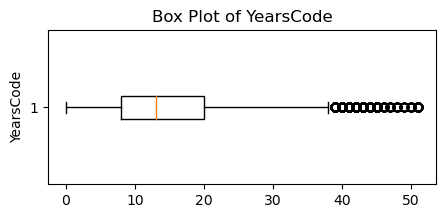

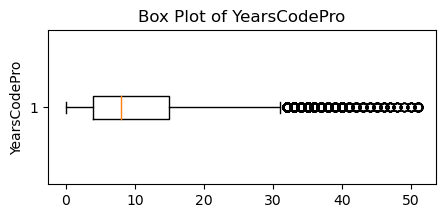

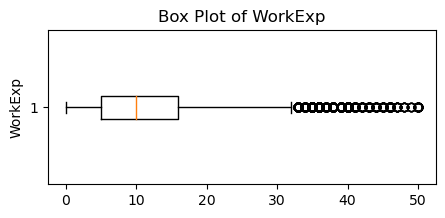

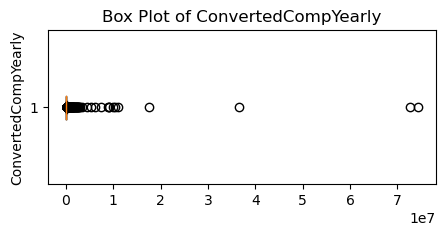

In [18]:
#Using boxplot to check outliers
for col in numerical_cols:
    plt.figure(figsize=(5,2))
    plt.boxplot(df1[col], vert=False)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(f'{col}')
    plt.show()

We will not touch the outliers of **`YearsCode`, `YearsCodePro`** and **`WorkExp`**
However the outliers in **`ConvertedCompYearly`** is concerning. While these ammounts must be true, the reasons might not be captured by our dataset and can throw off our model.

In [19]:
# Determining the outliers
Q1 = df1['ConvertedCompYearly'].quantile(0.25)
Q3 = df1['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = df1[(df1['ConvertedCompYearly'] < lower_bound) | (df1['ConvertedCompYearly'] > upper_bound)]
print(f'The upper bound for ConvertedCompYearly is {upper_bound} and {(outliers.count()[0]/df1.count()[0])*100:.2f}% of our values fall into outliers')

The upper bound for ConvertedCompYearly is 238178.875 and 4.58% of our values fall into outliers


### Observation:

4.6% of our data falls into outliers, which is a significantly high amount.

In our BoxPlot we see that there are multiple outliers below 1 million while there are a few which also surpass a million.

Lets evaluate what we see among the outliers.

## Checking the proportion of outliers in each DevType

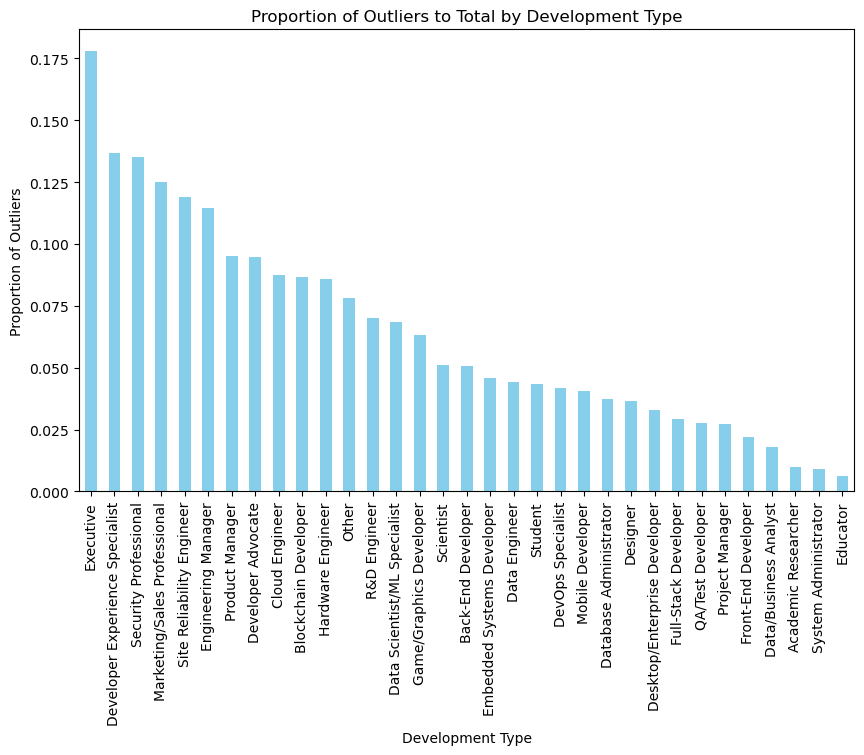

In [20]:
# Aggregating our data

dev_type_counts_outliers = outliers['DevType'].value_counts()
dev_type_counts_df1 = df1['DevType'].value_counts()
proportion = (dev_type_counts_outliers/dev_type_counts_df1)
proportion.fillna(0, inplace=True)
proportion.replace([float('inf'), -float('inf')], 0, inplace=True)
sorted_proportion = proportion.sort_values(ascending=False)

#reating a Barplot to display proportion of each devtype in outliers
plt.figure(figsize=(10, 6))
sorted_proportion.plot(kind='bar', color='skyblue')
plt.xlabel('Development Type')
plt.ylabel('Proportion of Outliers')
plt.title('Proportion of Outliers to Total by Development Type')
plt.xticks(rotation=90)
plt.show()

### Observation:

In terms of salary, Executives exhibit the highest proportion of outliers, with 16% falling beyond the upper bound. At the same time we see multiple sectors which have less than 5% of their population in the outliers. Such a wide gap indicates that the devtype plays some role in influencing the salary. Getting rid of all outliers can harm our predictions.

Instead, lets check what % of values lie beyond 500k yearly compensation.

In [21]:
total_entries = df1['ConvertedCompYearly'].count()
high_comp_entries = df1[df1['ConvertedCompYearly'] >= 500000]['ConvertedCompYearly'].count()
percentage_above_500k = (high_comp_entries / total_entries) * 100

print(f'{percentage_above_500k:.2f}% of our data lies above 500,000')

0.62% of our data lies above 500,000


We will drop entries over **500K**

In [22]:
df1 = df1[df1['ConvertedCompYearly']<=500000]

### Checking Data Cleaning

In [23]:
#df1.head(5)
#df1.shape
#df1.info()
#df1.isnull().sum()

##### We have now sucessfully cleaned our data and will save it as a separate dataset.

Note: We are yet to split the list like columns, however we will do that as requirement arises.

In [24]:
#Saving a cleaned version of the data
df1.to_csv('cleaned_data/CleanedData.csv', index=False)

In [25]:
df1.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,TechList,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,ICorPM,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
0,Professional Developer,25-34,[Employed full-time],Remote,Bachelor’s,[Other],18,9,Executive,2-9 employees,Investigate,United States of America,USD,"[HTML/CSS, JavaScript, Python]","[Bash/Shell (all shells), C#, Dart, Elixir, GD...",[Supabase],"[Firebase Realtime Database, Supabase]","[Amazon Web Services (AWS), Netlify, Vercel]","[Fly.io, Netlify, Render]","[Next.js, React, Remix, Vue.js]","[Deno, Elm, Nuxt.js, React, Svelte, Vue.js]","[Electron, React Native, Tauri]","[Capacitor, Electron, Tauri, Uno Platform, Xam...","[Docker, Kubernetes, npm, Pip, Vite, Webpack, ...","[Godot, npm, pnpm, Unity 3D, Unreal Engine, Vi...","[Vim, Visual Studio Code]","[Vim, Visual Studio Code]","[iOS, iPadOS, MacOS, Windows, Windows Subsyste...","[MacOS, Windows, Windows Subsystem for Linux (...","[Asana, Basecamp, GitHub Discussions, Jira, Li...","[GitHub Discussions, Linear, Notion, Trello]","[Cisco Webex Teams, Discord, Google Chat, Goog...","[Discord, Signal, Slack, Zoom]",People manager,10,"[DevOps function, Microservices, Automated tes...",Tech,285000
1,Professional Developer,45-54,[Employed full-time],Hybrid,Bachelor’s,[],27,23,Back-End Developer,5000-9999 employees,Given a list,United States of America,USD,"[Bash/Shell (all shells), Go]","[Haskell, OCaml, Rust]",[],[],"[Amazon Web Services (AWS), Google Cloud, Open...",[],[],[],[],[],"[Cargo, Docker, Kubernetes, Make, Nix]","[Cargo, Kubernetes, Nix]","[Emacs, Helix]","[Emacs, Helix]","[MacOS, Other Linux-based]","[MacOS, Other Linux-based]","[Markdown File, Stack Overflow for Teams]",[Markdown File],"[Microsoft Teams, Slack, Zoom]","[Slack, Zoom]",Individual contributor,23,"[DevOps function, Microservices, Automated tes...",Tech,250000
2,Professional Developer,25-34,[Employed full-time],Hybrid,Bachelor’s,[],12,7,Front-End Developer,100-499 employees,Investigate,United States of America,USD,"[Bash/Shell (all shells), HTML/CSS, JavaScript...","[Bash/Shell (all shells), HTML/CSS, JavaScript...","[PostgreSQL, Redis]","[PostgreSQL, Redis]","[Cloudflare, Heroku]","[Cloudflare, Heroku]","[Node.js, React, Ruby on Rails, Vue.js, WordPr...","[Node.js, Ruby on Rails, Vue.js]",[],[],"[Homebrew, npm, Vite, Webpack, Yarn]","[Homebrew, npm, Vite]","[IntelliJ IDEA, Vim, Visual Studio Code, WebSt...","[IntelliJ IDEA, Vim, WebStorm]","[iOS, iPadOS, MacOS]","[iOS, iPadOS, MacOS]",[Jira],[Jira],"[Discord, Google Meet, Microsoft Teams, Slack,...","[Discord, Google Meet, Slack, Zoom]",Individual contributor,7,"[Automated testing, Continuous integration (CI...",Unknown,156000
3,Professional Developer,25-34,"[Employed full-time, Independent contractor fr...",Remote,Bachelor’s,"[Other, Codecademy, edX]",6,4,Full-Stack Developer,20-99 employees,Investigate,Philippines,PHP,"[HTML/CSS, JavaScript, TypeScript]","[HTML/CSS, JavaScript, Python, Rust, TypeScript]","[BigQuery, Elasticsearch, MongoDB, PostgreSQL]","[Elasticsearch, MongoDB, PostgreSQL, Redis, Su...","[Amazon Web Services (AWS), Firebase, Heroku, ...","[Amazon Web Services (AWS), Cloudflare, Digita...","[Express, Gatsby, NestJS, Next.js, Node.js, Re...","[Express, NestJS, Next.js, Node.js, React, Rem...",[],[],"[Docker, npm, Webpack, Yarn]","[Docker, npm, Yarn]","[Vim, Visual Studio Code]","[Vim, Visual Studio Code]",[Other (Please Specify):],[Other (Please Specify):],"[Conflue

# Exploratory Data Analysis

**Note:** 
- For this study, we will limit ourselves to examining data from the US.
- We will also be putting special emphasis on the field of Data Science

In [26]:
df2 = df1.copy()
# Filtering for 'United States'
df2 = df2.loc[df['Country'] == 'United States of America']
df2.drop(columns=['Country', 'Currency'], inplace=True)
df2=df2.reset_index(drop=True)

# Filtering for data scientist entries
df_ds = df2.loc[df2['DevType'] == 'Data Scientist/ML Specialist']

### Histogram representing the distibution of `ConvertedCompYearly` among Data Scientists & Machine Learning Specialists

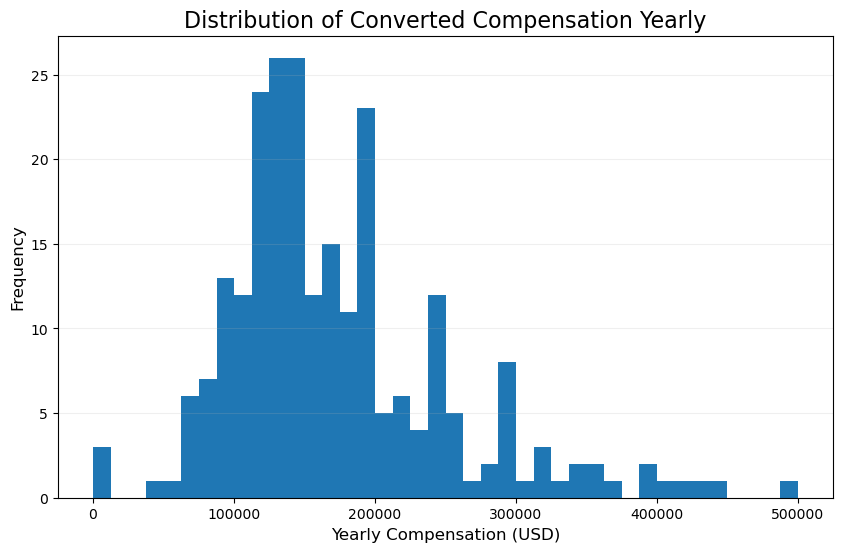

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df_ds[df_ds['ConvertedCompYearly']<=1000000]['ConvertedCompYearly'], bins=40)

plt.title('Distribution of Converted Compensation Yearly', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.2)

plt.show()

### Observation:

In the **`ConvertedCompYearly`** histogram

- We see that a major chunk of our datapoints lie between `$100K` and `$200K`

- The `$130K` - `$150K` range has the highest frequency

- The Histogram is right skewed

- We see spikes of datapoints at round figures like `$200K`, `$250K`, `$300K`...

### How Do Experience and Age Impact Salaries in the IT Sector?

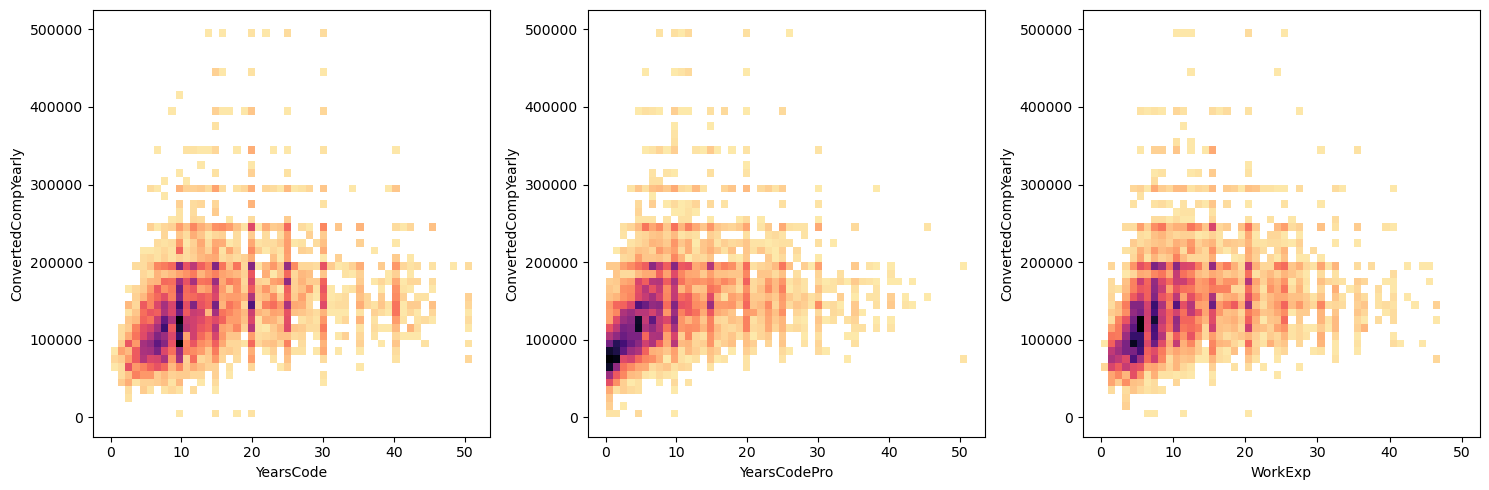

In [28]:
# Aggregating data
numeric_cols = df2.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col != 'ConvertedCompYearly']

# Plotting a hexbin plot to display the relationship of years of experience with yearly salaries
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(len(numeric_cols) * 5, 5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for j in range(len(numeric_cols)):
    sns.histplot(x=df2[numeric_cols[j]], y=df2['ConvertedCompYearly'], bins=50, pthresh=.1, cmap='magma_r', ax=axes[j])
    axes[j].set_xlabel(numeric_cols[j])
    axes[j].set_ylabel('ConvertedCompYearly')

plt.tight_layout()
plt.show()

### Observation:

In the IT sector, salary growth is strong in the early years, whether it comes from age, coding experience, or overall work experience. However, as professionals spend more time in the industry, the increase in salary slows down. This suggests that while experience is valuable, it doesn’t always lead to significantly higher pay over time.

## How Does the distribution of Education Level Differ Between the IT Industry and Data Science?

### Percentage of Education Levels in the IT sector

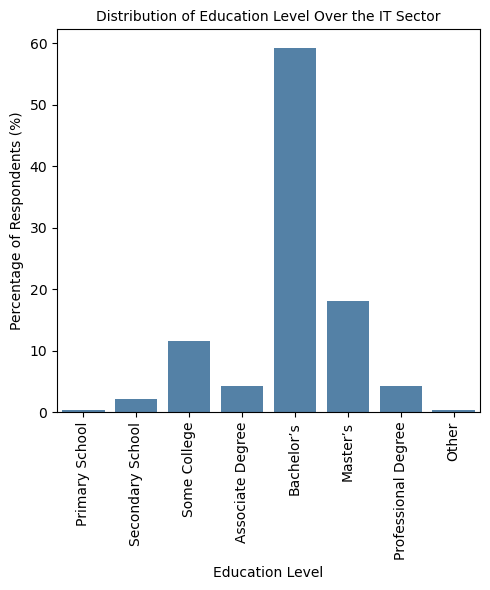

In [29]:
degree_pcnt = df2['EdLevel'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 6))
sns.barplot(x=degree_pcnt.index, y=degree_pcnt.values, color='steelblue')

plt.xlabel('Education Level', fontsize=10)
plt.ylabel('Percentage of Respondents (%)', fontsize=10)
plt.title('Distribution of Education Level Over the IT Sector', fontsize=10)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [30]:
degree_pcnt

Bachelor’s             59.325075
Master’s               18.103375
Some College           11.524989
Associate Degree        4.246049
Professional Degree     4.194789
Secondary School        2.076036
Primary School          0.264844
Other                   0.264844
Name: EdLevel, dtype: float64

### Percentage of Education Levels in Data Science

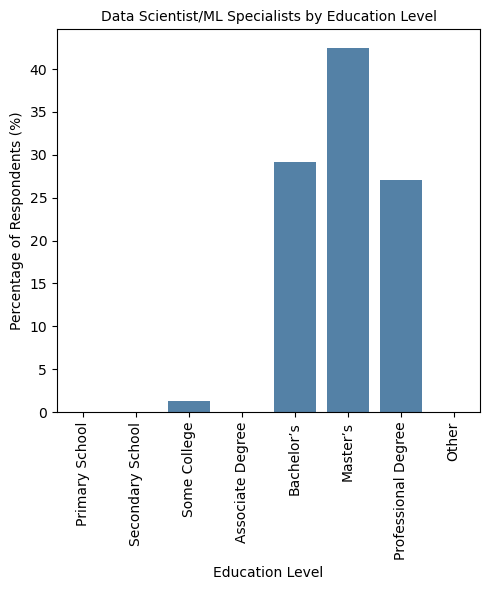

In [31]:
degree_pcnt_ds = df_ds['EdLevel'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 6))
sns.barplot(x=degree_pcnt_ds.index, y=degree_pcnt_ds.values, color='steelblue')

plt.xlabel('Education Level', fontsize=10)
plt.ylabel('Percentage of Respondents (%)', fontsize=10)
plt.title('Data Scientist/ML Specialists by Education Level', fontsize=10)
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [32]:
degree_pcnt_ds

Master’s               42.500000
Bachelor’s             29.166667
Professional Degree    27.083333
Some College            1.250000
Primary School          0.000000
Secondary School        0.000000
Associate Degree        0.000000
Other                   0.000000
Name: EdLevel, dtype: float64

### Observation:

Education remains integral to success in the IT industry, with most professionals holding at least a Bachelor’s degree.

**Across IT roles:**
- 59.2% have a Bachelor’s degree
- 18.4% hold a Master’s
- 4.2% possess a professional degree

**For Data Scientists and ML specialists:**
- Only 29.2% of Data Scientists hold a Bachelor’s
- 42.5% have a Master’s
- 27.1% hold a professional degree

This suggests that while a Bachelor's degree is often sufficient in general IT roles, advanced degrees are more highly valued in Data Science due to their emphasis on mathematics, statistics, and algorithmic foundations. 

## How does the Education Level impact the Yearly Compensation across the IT sector & Data Science?

### A Boxplot of Yearly Compensation Percentiles by Education Level in the IT Sector

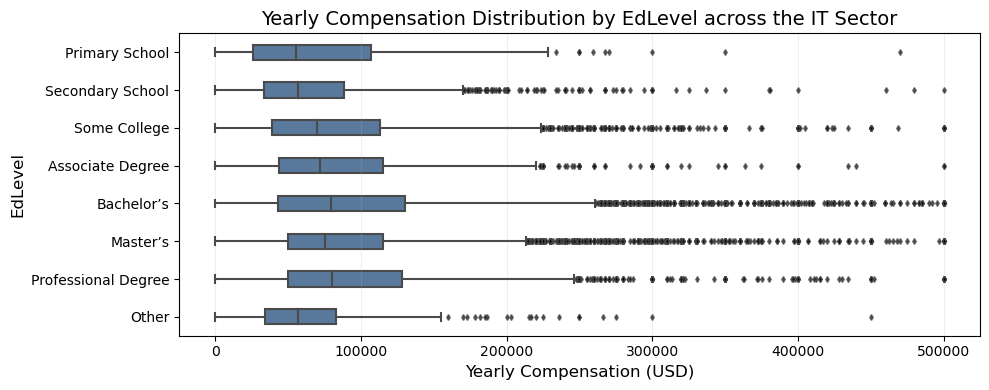

In [33]:
plt.figure(figsize=(10, 4))
sns.boxplot(y='EdLevel', x='ConvertedCompYearly', data=df1, orient='h', width = 0.4, color = '#4E79A7',
                flierprops=dict(marker='d', markerfacecolor='black', markersize=3, linestyle='none', alpha=0.7))
plt.title('Yearly Compensation Distribution by EdLevel across the IT Sector', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('EdLevel', fontsize=12)
plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
plt.show()

In [34]:
# 5 number summary for IT salary packages segmented by education level

IT_comp_by_edlvl_summary = df1.groupby('EdLevel')['ConvertedCompYearly'].describe()[['min', '25%', '50%', '75%', 'max']]
IT_comp_by_edlvl_summary

,min,25%,50%,75%,max
EdLevel,,,,,
Primary School,1.0,25701.0,55285.0,107090.00,470071.0
Secondary School,2.0,33144.5,56543.0,88201.75,500000.0
Some College,2.0,38717.0,69608.0,113000.00,500000.0
Associate Degree,1.0,43459.0,72000.0,115000.00,500000.0
Bachelor’s,1.0,42836.0,79325.0,130000.00,500000.0
Master’s,1.0,49655.0,74963.0,115249.50,500000.0
Professional Degree,3.0,50000.0,80317.0,128507.00,500000.0
Other,2.0,33897.5,56667.0,82630.00,450000.0


### A Boxplot of Yearly Compensation Percentiles by Education Level in Data Science

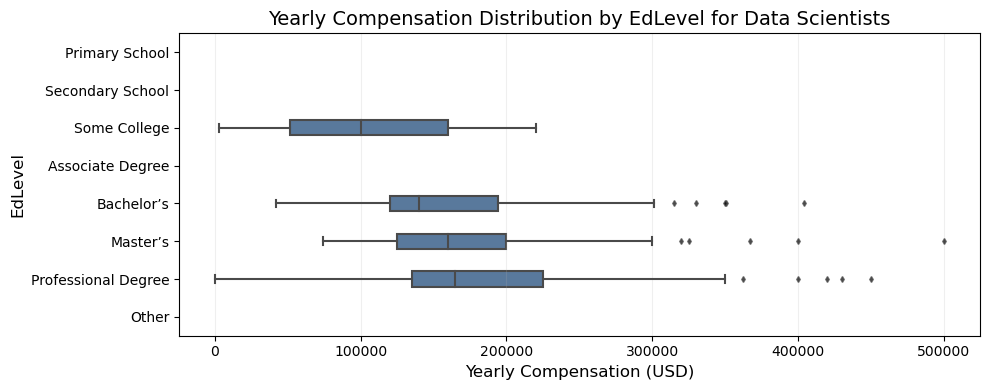

In [35]:
plt.figure(figsize=(10, 4))
sns.boxplot(y= 'EdLevel', x='ConvertedCompYearly', data=df_ds, orient='h', width = 0.4, color = '#4E79A7', 
            flierprops=dict(marker='d', markerfacecolor='black', markersize=3, linestyle='none', alpha=0.7))
plt.title(f'Yearly Compensation Distribution by EdLevel for Data Scientists', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('EdLevel', fontsize=12)
plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
plt.show()

In [36]:
# 5 number summary for Data Science packages segmented by education level
DS_comp_by_edlvl_summary = df_ds.groupby('EdLevel')['ConvertedCompYearly'].describe()[['min', '25%', '50%', '75%', 'max']]
DS_comp_by_edlvl_summary

,min,25%,50%,75%,max
EdLevel,,,,,
Primary School,NaN,NaN,NaN,NaN,NaN
Secondary School,NaN,NaN,NaN,NaN,NaN
Some College,2400.0,51200.0,100000.0,160000.0,220000.0
Associate Degree,NaN,NaN,NaN,NaN,NaN
Bachelor’s,42000.0,120000.0,140000.0,194500.0,404000.0
Master’s,74000.0,125000.0,160000.0,200000.0,500000.0
Professional Degree,185.0,135000.0,165000.0,225000.0,450000.0
Other,NaN,NaN,NaN,NaN,NaN


### Observation:

The box plots highlight clear differences in yearly compensation distribution between the IT sector and Data Science, segmented by education level.

In the broader IT sector, professionals with a Master’s degree earn a lower median salary than those with a Bachelor’s degree (`$74,963` vs. `$79,325`). Additionally, the 75th percentile salary of Master’s holders falls below that of Bachelor's holders (`$115,249` vs. `$130,000`). Interestingly, Bachelor’s and Professional degree holders have comparable earnings at both the median and 75th percentile levels.

However, in Data Science, higher education leads to a clear increase in salary potential. The median salary for a Master’s holder (`$160,000`) surpasses that of a Bachelor's (`$140,000`), and those with Professional degrees reach even higher at `$165,000`. This suggests that advanced degrees hold more value in Data Science compared to the broader IT industry.

## Discrepancies in IT Salaries by Country

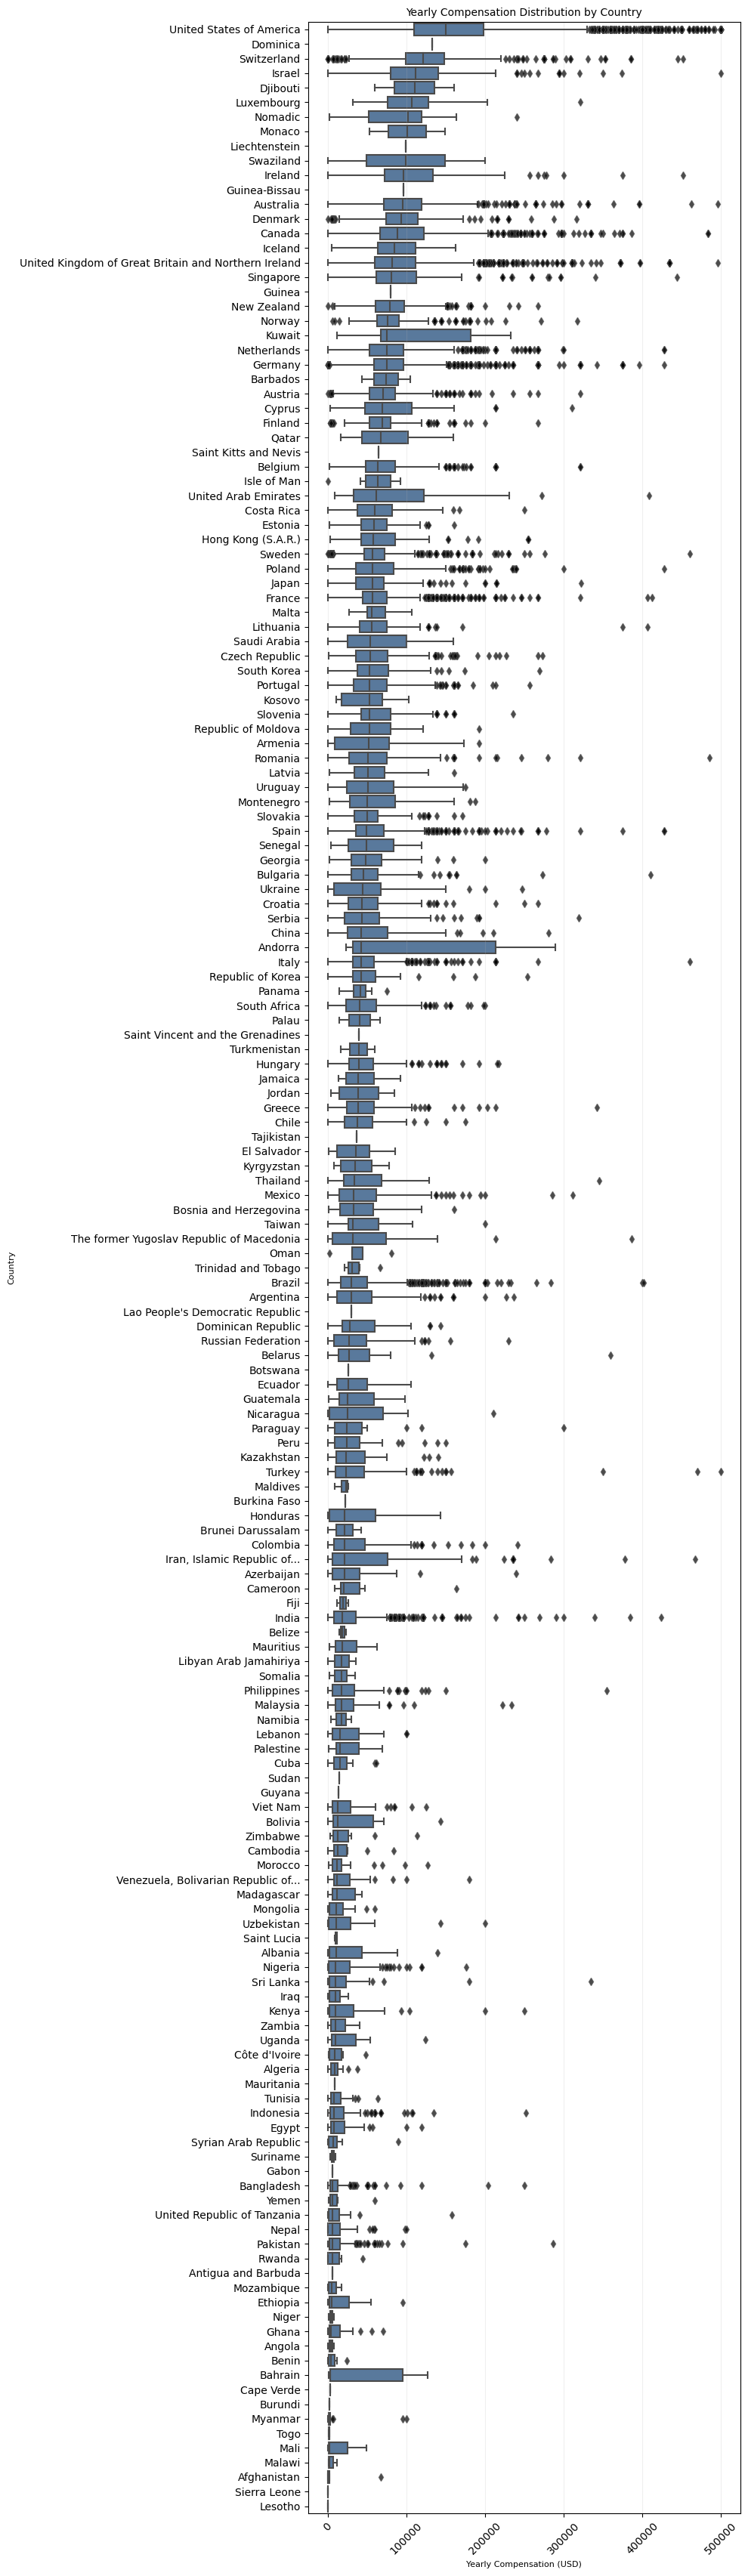

In [37]:
# Calculating 75 percentile to order the columns
percentile_75_compensation = df1.groupby('Country')['ConvertedCompYearly'].quantile(0.50).sort_values(ascending=False)
order = percentile_75_compensation.index

# Creating Box Plot to visualise the yearly compensation by country
plt.figure(figsize=(10, 0.2 * len(order)))
sns.boxplot(x='ConvertedCompYearly', y='Country', data=df1, order=order, color='#4E79A7',
            flierprops=dict(marker='d', markerfacecolor='black', markersize=5, linestyle='none', alpha=0.7))

plt.title('Yearly Compensation Distribution by Country', fontsize=10)
plt.xlabel('Yearly Compensation (USD)', fontsize=8)
plt.ylabel('Country', fontsize=8)
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.2)
plt.tight_layout()
plt.show()

We see that median salaries vary significantly across countries. This information is useful for individuals planning to migrate to another country to persue a career. We see that The United States has the highest median salaries, but other options like Switzerland, Isreal, Djibouti, Luxembourg offer appealing Salaries. 

It's also important to keep in mind that while certain countries have higher compensation packages, they might also have a high cost of living.

## Investigating the Relationship Between Programming Languages and Developer Roles
Differnet DevTypes use different coding languages to carry out their roles, and we are trying to determine which are the languages important for Data Scientists

### Bar Charts Showing the Distribution of Each Developer Type in Our Dataset

In [38]:
# Filtering for Data scientists and machine learning specialists
df_ds = df1[df1['DevType']=='Data Scientist/ML Specialist'].head()

The **`LanguageHaveWorkedWith`** column in our dataframe **`df1`** contains the languages the developer has worked with in the form of lists. We will use MLB to break it down into a column for each language.

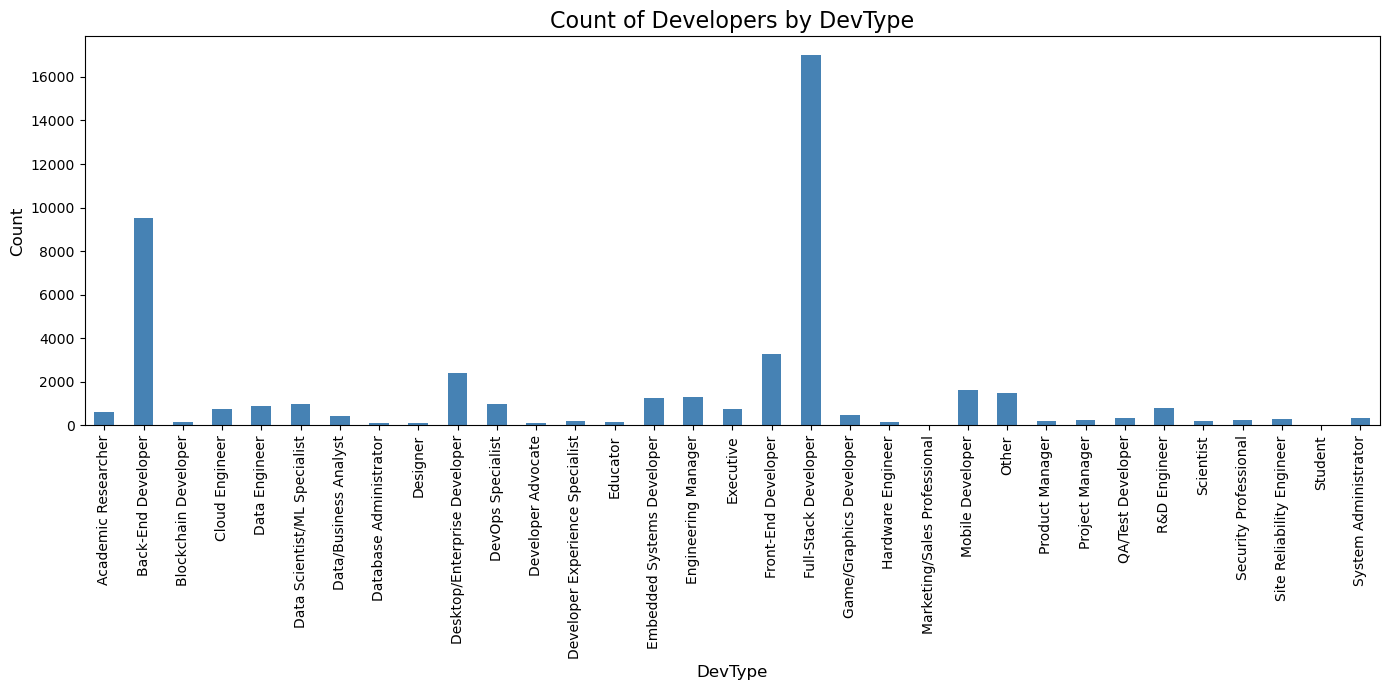

In [39]:
# Creating a separate dataset with MLB applied to the 'LanguageHaveWorkedWith' column

df_lang = df1[['LanguageHaveWorkedWith', 'DevType']].dropna(subset=['LanguageHaveWorkedWith'])
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_lang['total_count'] = 1

mlb = MultiLabelBinarizer()
transformed = mlb.fit_transform(df_lang['LanguageHaveWorkedWith'])
binarized_df = pd.DataFrame(transformed, columns=mlb.classes_, index=df_lang.index)

df_lang = df_lang.drop(columns=['LanguageHaveWorkedWith'])
df_lang = pd.concat([df_lang, binarized_df], axis=1)
df_lang = df_lang.set_index('total_count')
df_lang_reset = df_lang.reset_index()
devtype_count = df_lang_reset.groupby('DevType').agg('sum')

# Displaying the count of each Developer Type with a barplot
plt.figure(figsize=(14, 7))
devtype_count['total_count'].plot(kind='bar', color='steelblue')

plt.title('Count of Developers by DevType', fontsize=16)
plt.xlabel('DevType', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We observe that our dataset contains a large number of Full-Stack and Back-End Developers, which means they will have a significant impact on the aggregations we perform.

### Usage of programming languages across the IT industry

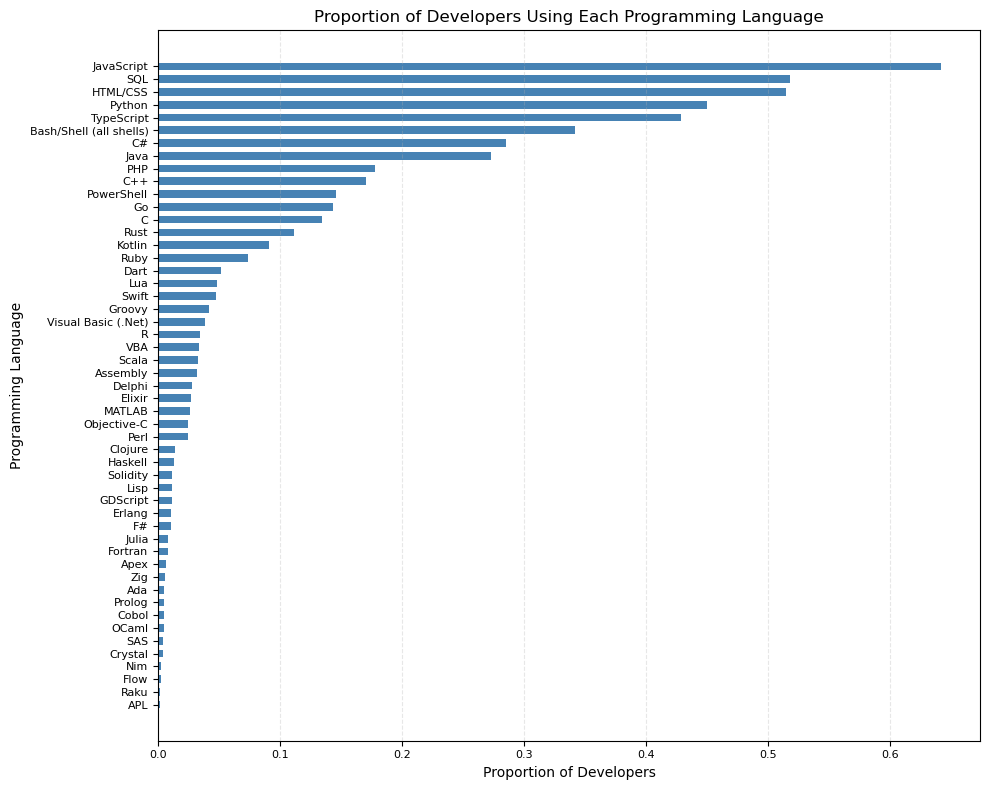

In [40]:
# Aggregating usage of each programming language using mean()
lang_pop = pd.DataFrame([df_lang.iloc[:, 1:].mean()])  # Mean gives the proportion directly
lang_pop = lang_pop.transpose()
lang_pop.columns = ['proportion']
lang_pop.reset_index(inplace=True)
lang_pop.rename(columns={'index': 'Language'}, inplace=True)
lang_pop = lang_pop.sort_values(by='proportion', ascending=True)

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(lang_pop['Language'], lang_pop['proportion'], height=0.6, color='steelblue')

plt.title('Proportion of Developers Using Each Programming Language', fontsize=12)
plt.xlabel('Proportion of Developers', fontsize=10)
plt.ylabel('Programming Language', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In the IT sector as a whole, we see that `JavaScript` is the most popular language, followed by `SQL` and `HTML/CSS`. `Python` comes in 4th place.

Now let's take a look at the popularity of programming languages among Data Scientists and ML Specialists.

### Usage of programming languages among Data Scientists and ML Specialists

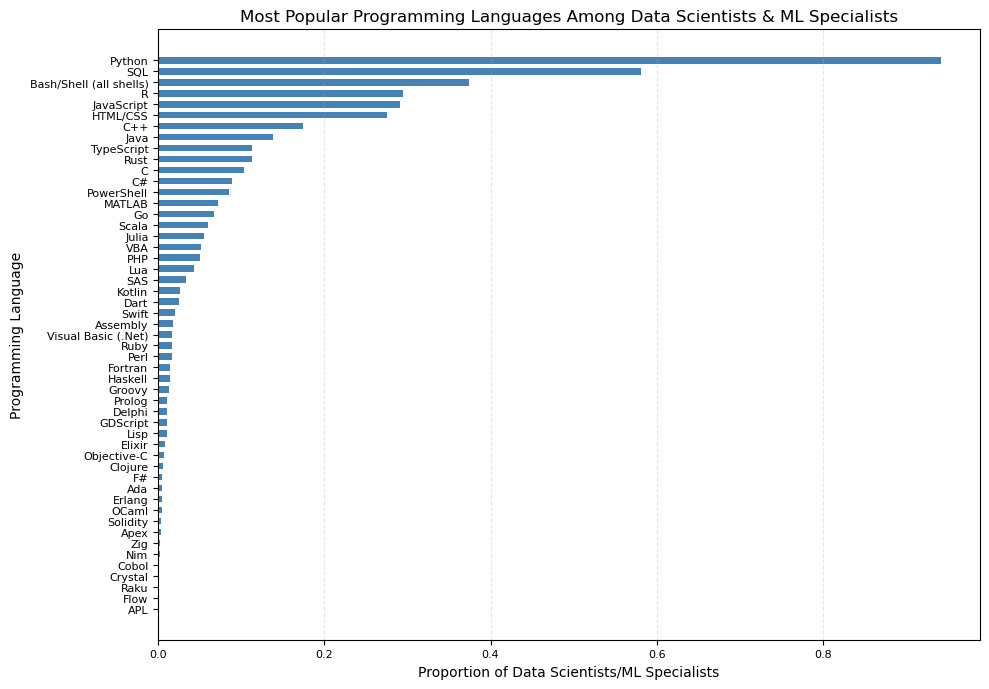

In [41]:
# Calculating proprotion of Data Scientists using programming languages
dev_lang_pop = df_lang.groupby('DevType').mean()
dev_type = "Data Scientist/ML Specialist"
dev_data = dev_lang_pop.loc[dev_type].sort_values(ascending=True)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 7))
plt.barh(dev_data.index, dev_data.values, color='steelblue', height=0.6)

plt.title('Most Popular Programming Languages Among Data Scientists & ML Specialists', fontsize=12)
plt.xlabel('Proportion of Data Scientists/ML Specialists', fontsize=10)
plt.ylabel('Programming Language', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [42]:
# Usage of programming languages for each developer type

'''dev_lang_pop = df_lang.groupby('DevType').sum()

for dev_type in dev_lang_pop.index:
    dev_data = dev_lang_pop.loc[dev_type].sort_values(ascending=False)
    
    plt.figure(figsize=(14, 7))
    plt.bar(dev_data.index, dev_data.values, color = 'steelblue', width=0.6)
    
    plt.title(f'Most Popular Programming Languages Among {dev_type}', fontsize=16)
    plt.xlabel('Programming Language', fontsize=12)
    plt.ylabel('Number of Developers', fontsize=13)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle = '--', alpha = 0.3)
    
    plt.tight_layout()
    plt.show()''';

### Observation:

Looking at these charts, we can see that certain languages are widely popular and dominate multiple fields. This could be due to various factors. After all, what programmer hasn’t started by building an HTML website?

However, sheer usage proportions alone don’t tell the full story. To get a clearer picture, we’ll analyze language usage within each developer type relative to its overall popularity.

### Which Programming Languages Are More Important for Data Scientists Compared to the IT Industry as a Whole?

In [43]:
# Aggregating our data to calculate relative importance of languages to Data Scientists

overall_lang_use_pcnt = pd.DataFrame([df_lang.iloc[:, 1:].mean()])

devtype_lang_use_pcnt = df_lang.groupby('DevType').mean()

relative_importance = devtype_lang_use_pcnt.div(overall_lang_use_pcnt.iloc[0], axis=1) * 100

top_10_lang = relative_importance.apply(lambda x: x.nlargest(10), axis = 1)

In [44]:
relative_importance.loc['Data Scientist/ML Specialist'].sort_values(ascending = False)

R                          860.329603
SAS                        810.714286
Julia                      666.678753
MATLAB                     281.700070
Prolog                     222.021340
Python                     209.184910
Scala                      185.996667
Fortran                    183.557951
VBA                        150.597081
SQL                        112.028599
Bash/Shell (all shells)    109.554640
Haskell                    107.753165
C++                        102.513293
Rust                       101.415423
Ada                         98.867596
GDScript                    91.433942
Lisp                        89.912860
Lua                         89.136126
Raku                        85.338346
OCaml                       83.866995
Nim                         77.828571
C                           76.944848
Perl                        66.180758
PowerShell                  58.158415
Assembly                    53.941851
HTML/CSS                    53.545219
Java        

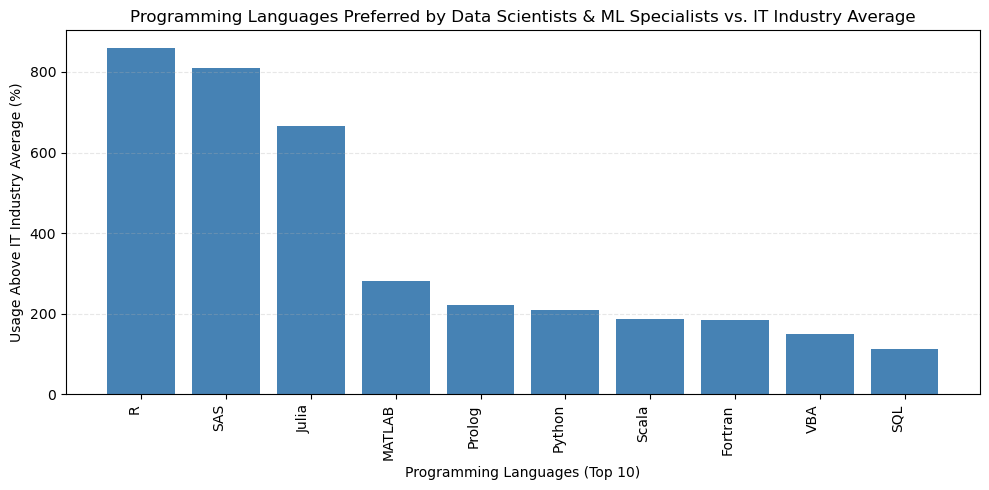

In [45]:
# Plotting relative importance of languages to Data Scientists compared to the IT sector

devtype_data = top_10_lang.loc["Data Scientist/ML Specialist"].dropna().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(devtype_data.index, devtype_data.values, color='steelblue')

plt.title(f"Programming Languages Preferred by Data Scientists & ML Specialists vs. IT Industry Average", fontsize=12)
plt.xlabel("Programming Languages (Top 10)", fontsize=10)
plt.ylabel("Usage Above IT Industry Average (%)", fontsize=10)
plt.xticks(rotation=90, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

### Observation:

When analyzing programming languages by relative importance, we notice that some languages, despite having a low overall usage rate, are highly specific to Data Scientists and Machine Learning Specialists.

For instance, Data Scientists are over 8 times more likely to use R compared to the average IT professional, highlighting its strong relevance in statistical computing and data analysis. Similarly, SAS and Julia also see disproportionately higher usage among Data Scientists, despite being less common in the broader IT industry.

This suggests that while general-purpose languages like Python and SQL remain widely used, certain specialized languages play a crucial role in Data Science, even if they are not as prevalent in IT as a whole.

In [46]:
# To display reletaively important languages for each dev type
'''
for dev_type in relative_importance.index:
    dev_data = relative_importance.loc[dev_type].sort_values(ascending=False)  # Sort in descending order
    
    plt.figure(figsize=(14, 5))
    dev_data.plot(kind='bar')

    plt.title(f'Programming Language Knowledge for {dev_type}', fontsize=16)
    plt.xlabel('Languages', fontsize=12)
    plt.ylabel('Likelihood', fontsize=12)

    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()''';

### How Does Programming Language Usage Vary Across Different Developer Roles?

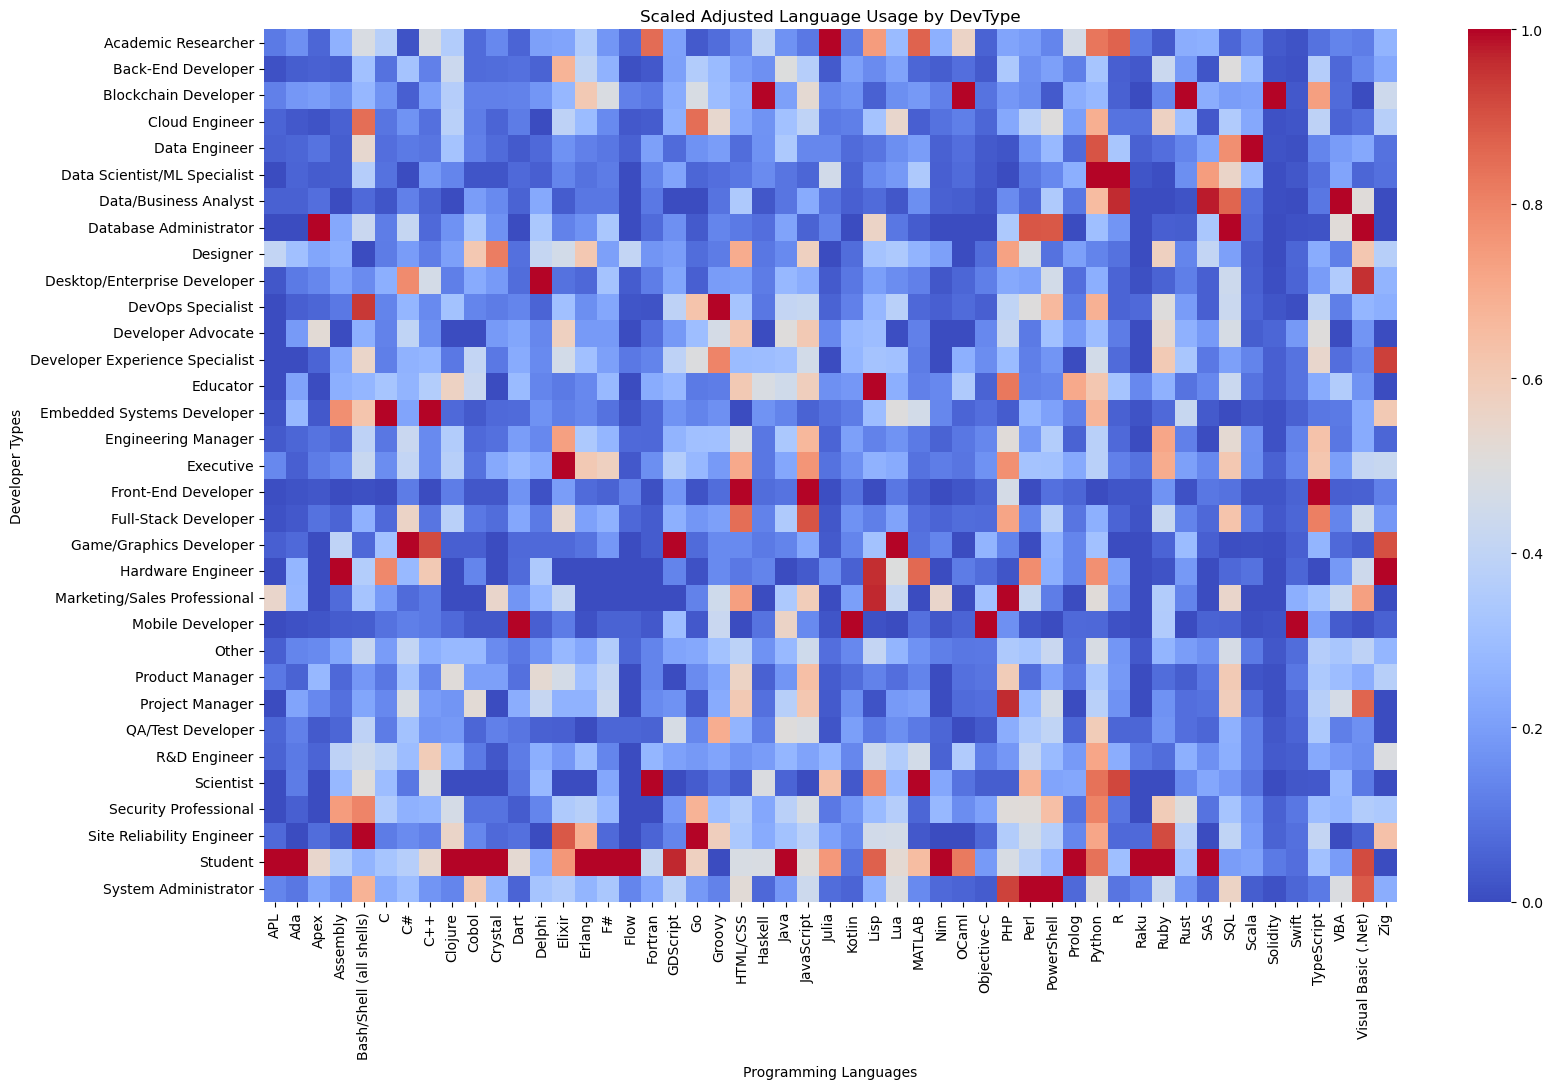

In [47]:
# Applying a scaler to our data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(relative_importance)
scaled_relative_importance = pd.DataFrame(scaled_data, 
                                             index=relative_importance.index, 
                                             columns=relative_importance.columns)

# Creating a heat map to display relative importance of programming languages to each developer type
plt.figure(figsize=(17, 11))
sns.heatmap(scaled_relative_importance, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Scaled Adjusted Language Usage by DevType')
plt.xlabel('Programming Languages')
plt.ylabel('Developer Types')
plt.tight_layout()
plt.show()

## What are the Databases, Platforms, Web Frameworks, Technologies, Tools, Collaboration Tools, and Office Stack Async Used by Data Scientists?

In [48]:
# Aggregating data for each category by using MLB to split up columns containing list data
multi_label_columns = [
    'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 
    'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 
    'OfficeStackAsyncHaveWorkedWith'
]

df_dict = {}

for column in multi_label_columns:
    df_temp = df1[[column]].copy()
    
    df_temp[column] = df_temp[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    df_temp = df_temp[df_temp[column].apply(lambda x: isinstance(x, list) and len(x) > 0)]

    mlb = MultiLabelBinarizer()
    binarized_df = pd.DataFrame(mlb.fit_transform(df_temp[column]), 
                                columns=mlb.classes_, 
                                index=df_temp.index)

    key = f"df_{column}"
    df_dict[key] = binarized_df

df_means = {}
for key, binarized_df in df_dict.items():
    df_means[f'{key}_vals'] = (binarized_df.mean() * 100).sort_values(ascending=False)

# Plotting a Chart to display usage rates
'''for key, values in df_means.items():
    plt.figure(figsize=(16, 8))
    plt.bar(values.index, values.values)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {key}')
    plt.show()''';

In [49]:
for i in df_means.keys():
    print(i, '\n',df_means[i], '\n'*2)

df_DatabaseHaveWorkedWith_vals 
 PostgreSQL                    50.661621
MySQL                         38.976596
SQLite                        29.446359
Microsoft SQL Server          29.241486
Redis                         24.370315
MongoDB                       24.047338
MariaDB                       17.484152
Elasticsearch                 16.734556
Dynamodb                      11.516306
Oracle                        10.195473
Cloud Firestore                5.719588
Firebase Realtime Database     5.476150
BigQuery                       5.338764
Cosmos DB                      4.497578
H2                             4.034804
Microsoft Access               3.528646
InfluxDB                       3.085155
Snowflake                      3.080335
Cassandra                      2.716383
Supabase                       2.371713
IBM DB2                        2.082480
Solr                           1.872786
Neo4J                          1.814939
Firebird                       1.282268
Couch D

# Data Preprocessing

In [50]:
# Creating a separate dataframe
df_1 = df1.copy()

**Due to difference in pay scales, we will limit ourselves to users from the US.**

In [51]:
# Retaining only users working in the US
df_1 = df_1.loc[df['Country'] == 'United States of America']
df_1.drop(columns=['Country'], inplace=True)
df_1=df_1.reset_index(drop=True)

df_1.drop(columns=['Currency'], inplace=True)
df_1 = df_1.reset_index(drop=True)

In [52]:
# Dropping the 'WantToWorkWith' columns
work_with = [col for col in df1.columns if col.__contains__('WantToWorkWith')]
df_1.drop(columns = work_with, inplace = True)

In [53]:
def preprocess_data(df, target_variable):
    """
    Preprocesses the dataset by applying:
    - Standard scaling to numeric columns (excluding target variable)
    - MultiLabel Binarization to list-based columns
    - Label Encoding to categorical columns
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - target_variable (str): The target variable to exclude from numeric scaling.
    
    Returns:
    - pd.DataFrame: The preprocessed DataFrame.
    """
    df = df.copy()
    ordinal_cols = ['EdLevel','Age','OrgSize','RemoteWork','ICorPM']
    
    # Define numeric columns excluding the target variable
    numeric_cols = [col for col in df.select_dtypes(include=['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns if col != target_variable]
    
    # Define list-based columns
    list_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).any()]
    
    # Define categorical columns
    categorical_cols = [col for col in df.columns if df[col].dtype.name == 'category' and col not in ordinal_cols]

    # StandardScaler Scaling for numeric columns
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # MultiLabel Binarization for list-based columns
    mlb = MultiLabelBinarizer()
    for col in list_cols:
        encoded_col = pd.DataFrame(
            mlb.fit_transform(df[col]),
            columns=[f"{col}_{value}" for value in mlb.classes_],
            index=df.index
        )
        df = pd.concat([df, encoded_col], axis=1)
    
    oe = OrdinalEncoder()
    df[ordinal_cols] = oe.fit_transform(df[ordinal_cols])
    
    # Drop original list-based columns
    df.drop(columns=list_cols, inplace=True)

    # one-Hot Encoding for categorical columns
    #df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    return df

df_1 = preprocess_data(df_1, target_variable='ConvertedCompYearly')

In [54]:
df_1.to_csv('cleaned_data/df_1.csv')

In [55]:
df_1[[col for col in df_1.select_dtypes(exclude=['category', 'object']).columns]]

,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,ICorPM,WorkExp,ConvertedCompYearly,Employment_Employed full-time,Employment_Employed part-time,Employment_Independent contractor freelancer or self-employed,Employment_Retired,LearnCodeCoursesCert_Codecademy,LearnCodeCoursesCert_Coursera,LearnCodeCoursesCert_Other,LearnCodeCoursesCert_Pluralsight,LearnCodeCoursesCert_Skillsoft,LearnCodeCoursesCert_Udacity,LearnCodeCoursesCert_Udemy,LearnCodeCoursesCert_edX,LanguageHaveWorkedWith_APL,LanguageHaveWorkedWith_Ada,LanguageHaveWorkedWith_Apex,LanguageHaveWorkedWith_Assembly,LanguageHaveWorkedWith_Bash/Shell (all shells),LanguageHaveWorkedWith_C,LanguageHaveWorkedWith_C#,LanguageHaveWorkedWith_C++,LanguageHaveWorkedWith_Clojure,LanguageHaveWorkedWith_Cobol,LanguageHaveWorkedWith_Crystal,LanguageHaveWorkedWith_Dart,LanguageHaveWorkedWith_Delphi,LanguageHaveWorkedWith_Elixir,LanguageHaveWorkedWith_Erlang,LanguageHaveWorkedWith_F#,LanguageHaveWorkedWith_Flow,LanguageHaveWorkedWith_Fortran,LanguageHaveWorkedWith_GDScript,LanguageHaveWorkedWith_Go,LanguageHaveWorkedWith_Groovy,LanguageHaveWorkedWith_HTML/CSS,LanguageHaveWorkedWith_Haskell,LanguageHaveWorkedWith_Java,LanguageHaveWorkedWith_JavaScript,LanguageHaveWorkedWith_Julia,LanguageHaveWorkedWith_Kotlin,LanguageHaveWorkedWith_Lisp,LanguageHaveWorkedWith_Lua,LanguageHaveWorkedWith_MATLAB,LanguageHaveWorkedWith_Nim,LanguageHaveWorkedWith_OCaml,LanguageHaveWorkedWith_Objective-C,LanguageHaveWorkedWith_PHP,LanguageHaveWorkedWith_Perl,LanguageHaveWorkedWith_PowerShell,LanguageHaveWorkedWith_Prolog,LanguageHaveWorkedWith_Python,LanguageHaveWorkedWith_R,LanguageHaveWorkedWith_Raku,LanguageHaveWorkedWith_Ruby,LanguageHaveWorkedWith_Rust,LanguageHaveWorkedWith_SAS,LanguageHaveWorkedWith_SQL,LanguageHaveWorkedWith_Scala,LanguageHaveWorkedWith_Solidity,LanguageHaveWorkedWith_Swift,LanguageHaveWorkedWith_TypeScript,LanguageHaveWorkedWith_VBA,LanguageHaveWorkedWith_Visual Basic (.Net),LanguageHaveWorkedWith_Zig,DatabaseHaveWorkedWith_BigQuery,DatabaseHaveWorkedWith_Cassandra,DatabaseHaveWorkedWith_Clickhouse,DatabaseHaveWorkedWith_Cloud Firestore,DatabaseHaveWorkedWith_Cockroachdb,DatabaseHaveWorkedWith_Cosmos DB,DatabaseHaveWorkedWith_Couch DB,DatabaseHaveWorkedWith_Couchbase,DatabaseHaveWorkedWith_Datomic,DatabaseHaveWorkedWith_DuckDB,DatabaseHaveWorkedWith_Dynamodb,DatabaseHaveWorkedWith_Elasticsearch,DatabaseHaveWorkedWith_Firebase Realtime Database,DatabaseHaveWorkedWith_Firebird,DatabaseHaveWorkedWith_H2,DatabaseHaveWorkedWith_IBM DB2,DatabaseHaveWorkedWith_InfluxDB,DatabaseHaveWorkedWith_MariaDB,DatabaseHaveWorkedWith_Microsoft Access,DatabaseHaveWorkedWith_Microsoft SQL Server,DatabaseHaveWorkedWith_MongoDB,DatabaseHaveWorkedWith_MySQL,DatabaseHaveWorkedWith_Neo4J,DatabaseHaveWorkedWith_Oracle,DatabaseHaveWorkedWith_PostgreSQL,DatabaseHaveWorkedWith_RavenDB,DatabaseHaveWorkedWith_Redis,DatabaseHaveWorkedWith_SQLite,DatabaseHaveWorkedWith_Snowflake,DatabaseHaveWorkedWith_Solr,DatabaseHaveWorkedWith_Supabase,DatabaseHaveWorkedWith_TiDB,PlatformHaveWorkedWith_Amazon Web Services (AWS),PlatformHaveWorkedWith_Cloudflare,PlatformHaveWorkedWith_Colocation,PlatformHaveWorkedWith_Digital Ocean,PlatformHaveWorkedWith_Firebase,PlatformHaveWorkedWith_Fly.io,PlatformHaveWorkedWith_Google Cloud,PlatformHaveWorkedWith_Heroku,PlatformHaveWorkedWith_Hetzner,PlatformHaveWorkedWith_IBM Cloud Or Watson,"PlatformHaveWorkedWith_Linode, now Akamai",PlatformHaveWorkedWith_Managed Hosting,PlatformHaveWorkedWith_Microsoft Azure,PlatformHaveWorkedWith_Netlify,PlatformHaveWorkedWith_OVH,PlatformHaveWorkedWith_OpenShift,PlatformHaveWorkedWith_OpenStack,PlatformHaveWorkedWith_Oracle Cloud Infrastructure (OCI),PlatformHaveWorkedWith_Render,PlatformHaveWorkedWith_Scaleway,PlatformHaveWorkedWith_VMware,PlatformHaveWorkedWith_Vercel,PlatformHaveWorkedWith_Vultr,WebframeHaveWorkedWith_ASP.NET,WebframeHaveWorkedWith_ASP.NET CORE,WebframeHaveWorkedWith_Angular,WebframeHaveWorkedWith_AngularJS,WebframeHaveWorkedWith_Blazor

# What are the most important features influencing IT salaries in the US?

In [56]:
# Training a RFR to extract important features determining salaries
X = df_1.select_dtypes(exclude=['category', 'object']).drop(columns=['ConvertedCompYearly'])
y = df_1['ConvertedCompYearly']

rfr = RandomForestRegressor(n_jobs=-1,random_state=42)
rfr.fit(X, y)

# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfr.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances[:20].round(2))

                                              Feature  Importance
4                                        YearsCodePro        0.14
324                     OpSysProfessional use_Windows        0.04
5                                             OrgSize        0.04
3                                           YearsCode        0.03
395              ProfessionalTech_Observability tools        0.03
7                                             WorkExp        0.02
387   ProfessionalTech_AI-assisted technology tool(s)        0.01
2                                             EdLevel        0.01
373     OfficeStackSyncHaveWorkedWith_Microsoft Teams        0.01
53                         LanguageHaveWorkedWith_PHP        0.01
41                    LanguageHaveWorkedWith_HTML/CSS        0.01
6                                              ICorPM        0.01
340               OfficeStackAsyncHaveWorkedWith_Jira        0.01
44                  LanguageHaveWorkedWith_JavaScript        0.01
1         

We observe that the number of years a person has been coding professionally is the most important factor determining compensation. Following that, we have the size of the organisation is also another important factor to consider. Number of years coding and total work experience have a weaker influence on the salaries than years of professional coding. Being an Individual contributor or people manger also plays a part in determining salaries.

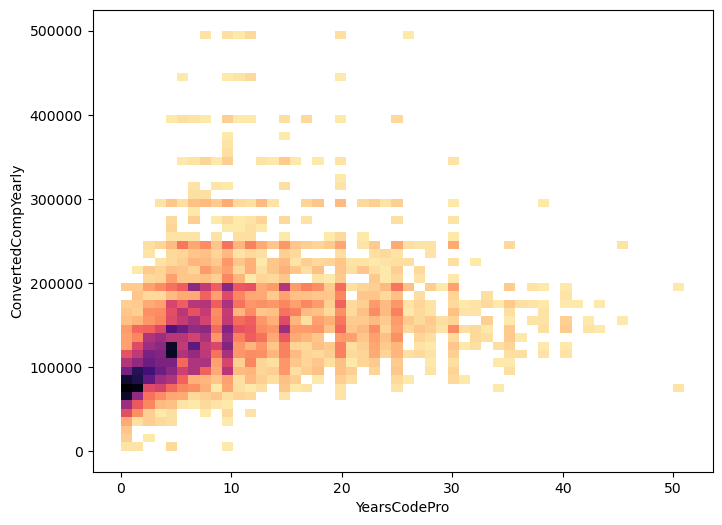

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))  # Create a single subplot

sns.histplot(
    x=df2['YearsCodePro'], 
    y=df2['ConvertedCompYearly'], 
    bins=50, 
    pthresh=0.1, 
    cmap='magma_r', 
    ax=ax  # Pass the single axis
)

ax.set_xlabel('YearsCodePro')  # Use ax instead of axes
ax.set_ylabel('ConvertedCompYearly')

plt.show()